# Machine Learning Project GMIT by Greg Feeley

## Describe, Infer and Predict Using Boston Housing Dataset

Backround: The Boston Housing Dataset is a well known dataset concerning details in relation to housing the Boston metropolitan area. The dataset consists of 13 variables plus the median value of the houses.

The dataset will be explored using descriptive statistics and plots. There is a linear regression model produced using two of the varibales. The CHAS variable will be discussed in relation to it's correlation with house prices.Finally a prediction model will be produced with performance comparisons. 

In [2]:
#import libraries
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import keras as kr
import sklearn.preprocessing as pre
import sklearn.model_selection as mod
import sklearn.decomposition as dec
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [3]:
#import dataset from sklearn
from sklearn.datasets import load_boston
boston_dataset = load_boston()
#print description of dataset
print(boston_dataset.DESCR)
#assign dataframe and print sample edited from https://anujdutt9.github.io/LinearRegressionTF.html
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df.describe
print(df.head())           

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#target MEDV column for dataset and name PRICE
df['PRICE'] = boston_dataset.target
#show shape of data for inspection
df.shape

(506, 14)

### The pearson correlation matrix below gives a good initial idea of the varibales and their relationship.

In [5]:
#use pearson correlation method edited from https://pythontic.com/pandas/dataframe-computations/correlation
df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### From the above correlation matrix we can see that there is high correlation with Price and RM and also the INDUS and NOX variables. The below heatmap helps with a more visual represenation of possible correlations. There is also some strong positive correlation between a lot of the other variables that may lead to problems when desiging an accurate prediction model.

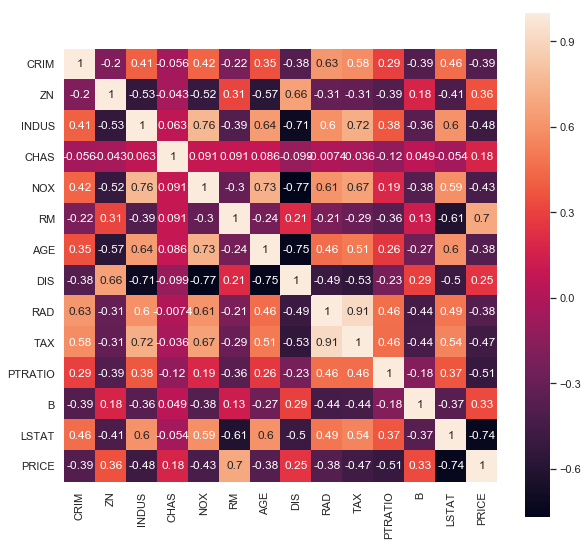

In [6]:
#heatmap of correlation annotate each cell with numeric value 
sns.set(rc={'figure.figsize':(9.7,9.28)})
sns.heatmap(df.corr().round(4), square=True, annot=True)

### A summary of  dataset can also be generated giving a descriptive idea statistically of the variables. It is clearly visible that the variables differ significantly in scale.

In [7]:
#summary of data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### As an example we can examine two variables from the dataset.  From the heatmap above we can see a correlation between the INDUS and NOX variable. We can use these variables for a regression model

In [8]:
#declare required varibale for regression and print
x_indus=df.INDUS
y_nox=df.NOX
print(x_indus)
print(y_nox)

0       2.31
1       7.07
2       7.07
3       2.18
4       2.18
5       2.18
6       7.87
7       7.87
8       7.87
9       7.87
10      7.87
11      7.87
12      7.87
13      8.14
14      8.14
15      8.14
16      8.14
17      8.14
18      8.14
19      8.14
20      8.14
21      8.14
22      8.14
23      8.14
24      8.14
25      8.14
26      8.14
27      8.14
28      8.14
29      8.14
       ...  
476    18.10
477    18.10
478    18.10
479    18.10
480    18.10
481    18.10
482    18.10
483    18.10
484    18.10
485    18.10
486    18.10
487    18.10
488    27.74
489    27.74
490    27.74
491    27.74
492    27.74
493     9.69
494     9.69
495     9.69
496     9.69
497     9.69
498     9.69
499     9.69
500     9.69
501    11.93
502    11.93
503    11.93
504    11.93
505    11.93
Name: INDUS, Length: 506, dtype: float64
0      0.538
1      0.469
2      0.469
3      0.458
4      0.458
5      0.458
6      0.524
7      0.524
8      0.524
9      0.524
10     0.524
11     0.524
12     0.5

In [9]:
#training and test variables with test size to define amount of dataset used
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(x_indus, y_nox, test_size = 0.35)
#print shape of data used in sample
print(X_train_1.shape)
print(X_test_1.shape)
print(Y_train_1.shape)
print(Y_test_1.shape)

(328,)
(178,)
(328,)
(178,)


In [10]:
#reshape the array without changing the data.
X_indus = np.array(x_indus).reshape(-1,1)
y_nox = np.array(y_nox).reshape(-1,1)

In [11]:
#split data edited from https://medium.com/@contactsunny/how-to-split-your-dataset-to-train-and-test-datasets-using-scikit-learn-e7cf6eb5e0d
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_indus, y_nox, test_size = 0.2, random_state=0)

In [12]:
#start regression fit 
regression = LinearRegression()
regression.fit(X_train_1, Y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
#prediction with non negative square root of array and sklearn metrics
y_train_predict_1 = regression.predict(X_train_1)
rmse = (np.sqrt(mean_squared_error(Y_train_1, y_train_predict_1)))
##print formatted version of rmse
print('RMSE is {}'.format(rmse))

RMSE is 0.07516631301681419


In [14]:
#evalute the test train set use numpy square root
prediction2 = regression.predict(X_test_1)
rmse = (np.sqrt(mean_squared_error(Y_test_1, prediction2)))
#round root squared score to 3 decimals use sklearn metrics
root2 = round(regression.score(X_test_1, Y_test_1),3)
#print results for rmse and rsquared
print("RMSE: {}".format(rmse))
print("R^2: {}".format(root2))

RMSE: 0.07337882835496352
R^2: 0.616


### The above shows regression model Root Mean Squared score for the INDUS and NOX variables and the model is plotted out below

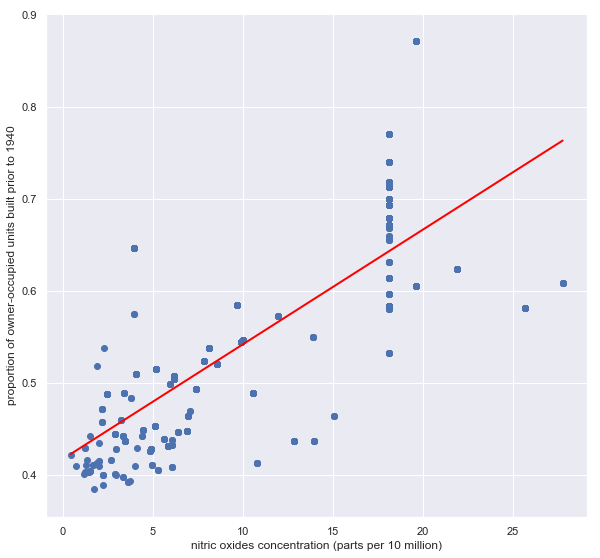

In [15]:
##fit and predict model plot
##edited from https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/regression-2?ex=6
prediction_space = np.linspace(min(x_indus), max(x_indus)).reshape(-1,1) 
plt.scatter(x_indus,y_nox)
plt.plot(prediction_space, regression.predict(prediction_space), color = 'red', linewidth = 2)
plt.ylabel('proportion of owner-occupied units built prior to 1940')
plt.xlabel('nitric oxides concentration (parts per 10 million)')
plt.show()

### Below is a histogram of all variables in relation to Price. This will give a good visual idea of distribution. The individual varibales are then presented as scatter plots in relation to price.

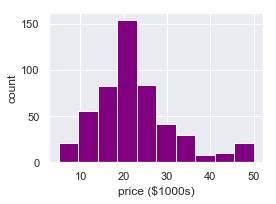

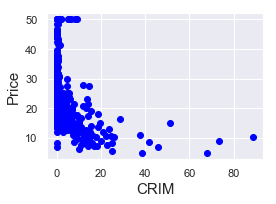

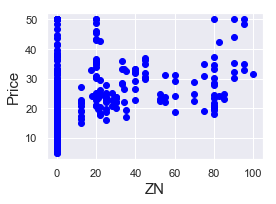

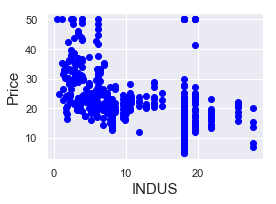

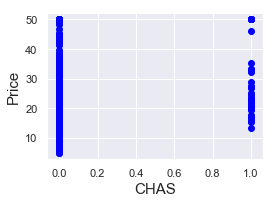

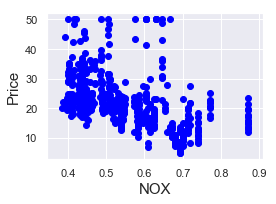

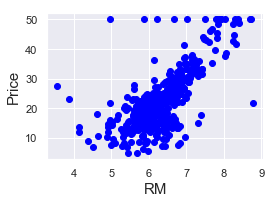

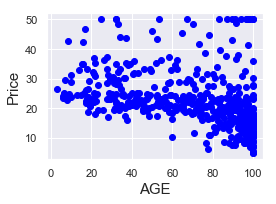

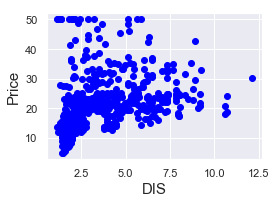

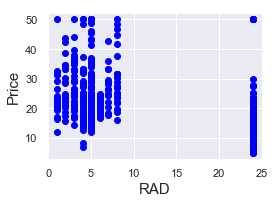

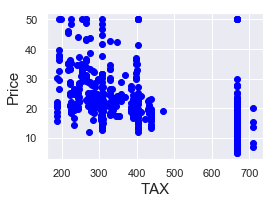

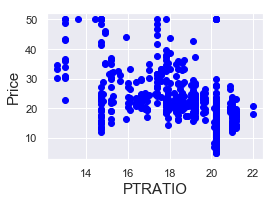

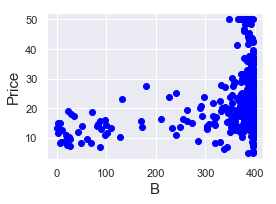

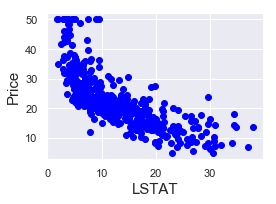

In [16]:
#edited from https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_boston_prediction.html
#histogram of of variable quantities in relation to price
plt.figure(figsize=(4, 3))
plt.hist(boston_dataset.target,color='purple' )
plt.xlabel('price ($1000s)')
plt.ylabel('count')
plt.tight_layout()
#show scatter for each column in relation to price use enumerate to loop
for index, feature_name in enumerate(boston_dataset.feature_names):
    plt.figure(figsize=(4, 3))
    plt.scatter(boston_dataset.data[:, index], boston_dataset.target,color="blue")
    plt.ylabel('Price', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

### When considering the Charles River(CHAS) data above we can infer from the scatter plot that whether a property positioned on the river has an effect on house price. Below we can isolate the varibales that have a high corrleation with the target varibale price.Even considering what maybe a low positive correlation score of 0.3 the CHAS varibale is below this and will be omitted from the prediction model.

In [17]:
#find what variables correlate with the target price.
cor = df.corr()
variables = abs(cor["PRICE"])
gooddata = variables[variables>0.3]
print(gooddata)

CRIM       0.388305
ZN         0.360445
INDUS      0.483725
NOX        0.427321
RM         0.695360
AGE        0.376955
RAD        0.381626
TAX        0.468536
PTRATIO    0.507787
B          0.333461
LSTAT      0.737663
PRICE      1.000000
Name: PRICE, dtype: float64


## The above infers that the CHAS variable has little in the way of importance with prices.

## Keras model using all varibales except CHAS with PRICE as the target prediction variable

In [44]:
#prepare and print data for modelling

#the features that are inputed
x = df[['NOX', 'CRIM', 'RM','ZN', 'INDUS', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

#what we are looking to predict
y = df['PRICE']
print(x)
print(y)

       NOX      CRIM     RM    ZN  INDUS    AGE     DIS   RAD    TAX  PTRATIO  \
0    0.538   0.00632  6.575  18.0   2.31   65.2  4.0900   1.0  296.0     15.3   
1    0.469   0.02731  6.421   0.0   7.07   78.9  4.9671   2.0  242.0     17.8   
2    0.469   0.02729  7.185   0.0   7.07   61.1  4.9671   2.0  242.0     17.8   
3    0.458   0.03237  6.998   0.0   2.18   45.8  6.0622   3.0  222.0     18.7   
4    0.458   0.06905  7.147   0.0   2.18   54.2  6.0622   3.0  222.0     18.7   
5    0.458   0.02985  6.430   0.0   2.18   58.7  6.0622   3.0  222.0     18.7   
6    0.524   0.08829  6.012  12.5   7.87   66.6  5.5605   5.0  311.0     15.2   
7    0.524   0.14455  6.172  12.5   7.87   96.1  5.9505   5.0  311.0     15.2   
8    0.524   0.21124  5.631  12.5   7.87  100.0  6.0821   5.0  311.0     15.2   
9    0.524   0.17004  6.004  12.5   7.87   85.9  6.5921   5.0  311.0     15.2   
10   0.524   0.22489  6.377  12.5   7.87   94.3  6.3467   5.0  311.0     15.2   
11   0.524   0.11747  6.009 

In [45]:
#split the dataset
x_train, x_test, y_train, y_test = mod.train_test_split(x, y, test_size=0.4)

In [46]:
#build the model
m = kr.models.Sequential()
#build model one hidden layer 100 neurons, 12 input neurons,2ndlayer with 50 neurons relu activation, 3rd layer 1 neuron output
m.add(kr.layers.Dense(100, input_dim=12, activation="relu"))
m.add(kr.layers.Dense(50, kernel_initializer='normal', activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))
#compile with MSE and adam optimiser.
m.compile(loss="mean_squared_error", optimizer="adam")

In [47]:
#fit model on training set with 100 epochs
m.fit(x_train, y_train, epochs=100, batch_size=15)

Epoch 1/100
303/303 [==============================] - 0s 625us/step - loss: 296.3736
Epoch 2/100
303/303 [==============================] - 0s 56us/step - loss: 72.4560
Epoch 3/100
303/303 [==============================] - 0s 82us/step - loss: 65.6157
Epoch 4/100
303/303 [==============================] - 0s 86us/step - loss: 61.8349
Epoch 5/100
303/303 [==============================] - 0s 66us/step - loss: 59.7842
Epoch 6/100
303/303 [==============================] - 0s 86us/step - loss: 59.9168
Epoch 7/100
303/303 [==============================] - 0s 86us/step - loss: 66.6870
Epoch 8/100
303/303 [==============================] - 0s 69us/step - loss: 72.8647
Epoch 9/100
303/303 [==============================] - 0s 82us/step - loss: 56.4282
Epoch 10/100
303/303 [==============================] - 0s 86us/step - loss: 61.7261
Epoch 11/100
303/303 [==============================] - 0s 59us/step - loss: 52.0969
Epoch 12/100
303/303 [==============================] - 0s 72us/step - l

303/303 [==============================] - 0s 72us/step - loss: 19.9553
Epoch 98/100
303/303 [==============================] - 0s 76us/step - loss: 23.8038
Epoch 99/100
303/303 [==============================] - 0s 76us/step - loss: 22.6159
Epoch 100/100
303/303 [==============================] - 0s 82us/step - loss: 20.4096


In [48]:
#prediction that network makes on set
m.predict(x_test).round().T

array([[15., 14., 13., 19., 24., 11., 10., 25., 18., 21.,  0., -1., 11.,
         9., 17., 13., 26., 20., 27., 22., 16., 14., 25., 14.,  3., 30.,
        28., 22.,  4., 36., 24., 10., 29., 19., 20., 18., 24., 22.,  3.,
        14., 16., 22., 19.,  1., 16., 13., 21., 18., -0., 18., 19., 34.,
        13.,  3., 10., 19., 18., 38., 18., 19., 27., 27., 11., 43., 17.,
        23., 10., 38., 17., 20.,  3., 29., 14., 14., 21., 17., -2., 18.,
        20., 16.,  8., 24., 14., 22., 32., 28., 21., 20., 23., 31., 30.,
        14., 39., 23., 27., 15., 17.,  9., 18., 17., 24.,  7., 21., 27.,
        18., 27., 17., 25., 20., 37., 21., 32., 25., 19., -1., 20., 17.,
        32., 30., 24., 13., 13., 13., 28., 21., 14.,  6., 20., 15., 17.,
        25., 20., 25., 33., 23., 14., 10., 14., 18.,  9.,  2., -1., 33.,
        19., 17., 39., 21.,  8., 19., 16., 12., 20., 11., 19., 10., 25.,
        25., 26.,  3., 19., 26., 11., 15., 24., 35., 19., 17., 14.,  8.,
        12.,  8., 36., 26.,  9.,  9., 16.,  9., 15.

In [49]:
#actual values from test set
y_test.as_matrix().astype(np.float32)

C:\Users\gregf\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([27.5, 13.6, 14.5, 21.5, 23.7,  8.5, 13.3, 26.6, 20.9, 22.2,  7.4,
       13.8,  7. , 10.9, 19.8, 15.6, 24.6, 22. , 24.8, 29. , 17. , 21.7,
       26.2, 12.6, 13.8, 32. , 27.5, 27.1,  8.3, 37.2, 28. , 19. , 42.3,
       21.9, 22.7, 18.2, 23.1, 28.7, 10.2, 13.1, 21.4, 23.3, 19.2, 13.2,
       18.4, 18.5, 22.2, 17.1,  5. , 18.5, 20.7, 37.6, 13.8,  8.7, 14.8,
       22.2, 21.7, 50. , 14.2, 23.8, 33.1, 29.6, 16.3, 50. , 11.7, 29.6,
       17.2, 31.6, 20. , 24.3, 13.4, 36.1, 15.6, 15. , 25. , 19.5, 17.9,
       21.2, 29.8, 16.1, 14.4, 33.2, 16.1, 20.4, 50. , 29.4, 21.6, 30.3,
       22. , 35.4, 31.5, 19.9, 50. , 23.2, 36.2, 15.6, 18. , 11.3, 18.3,
       20.3, 32.7, 13.5, 27.5, 24.5, 20.6, 50. , 19.3, 23.9, 19.3, 44. ,
       19.2, 46. , 24.6, 23.3,  8.5, 21.2, 18.4, 41.3, 36.2, 23.4, 20.1,
       13.4, 16.7, 34.6, 21.7, 17.2, 10.4, 25. , 14.3, 15.3, 34.7, 23. ,
       24.2, 28.5, 23.8, 15.2, 13.4, 13. , 21.1,  9.5,  8.8,  5. , 37.3,
       20. , 19.7, 32.5, 11.9, 12.8, 21. , 16.1, 14

In [50]:
#use evaluate function to evaluate test set.
FirstTest = m.evaluate(x_test, y_test)
print("Result of The First Test is", FirstTest)

203/203 [==============================] - 0s 447us/step
Result of The First Test is 35.39236320533189


### Scaling The Data

In [117]:
#scale the data using min/max scaler preprocessing
scaler = pre.MinMaxScaler(feature_range=(-2,5))
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

In [118]:
#build the model
m = kr.models.Sequential()
#build model one hidden layer 100 neurons, 12 input neurons,2ndlayer with 50 neurons relu activation, 3rd layer 1 neuron output
m.add(kr.layers.Dense(100, input_dim=12, activation="relu"))
m.add(kr.layers.Dense(50, kernel_initializer='normal', activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))
#compile with MSE and adam optimiser.
m.compile(loss="mean_squared_error", optimizer="adam")

In [119]:
#fit model on training set with 100 epochs
m.fit(x_train, y_train, epochs=100, batch_size=15)

Epoch 1/100
303/303 [==============================] - 0s 1ms/step - loss: 108.0295
Epoch 2/100
303/303 [==============================] - 0s 92us/step - loss: 99.5869
Epoch 3/100
303/303 [==============================] - 0s 89us/step - loss: 69.0516
Epoch 4/100
303/303 [==============================] - 0s 89us/step - loss: 65.3108
Epoch 5/100
303/303 [==============================] - 0s 92us/step - loss: 62.8169
Epoch 6/100
303/303 [==============================] - 0s 92us/step - loss: 62.7675
Epoch 7/100
303/303 [==============================] - 0s 102us/step - loss: 76.8078
Epoch 8/100
303/303 [==============================] - 0s 112us/step - loss: 61.8490
Epoch 9/100
303/303 [==============================] - 0s 105us/step - loss: 55.6390
Epoch 10/100
303/303 [==============================] - 0s 92us/step - loss: 59.3978
Epoch 11/100
303/303 [==============================] - 0s 92us/step - loss: 61.6766
Epoch 12/100
303/303 [==============================] - 0s 92us/step - 

303/303 [==============================] - 0s 92us/step - loss: 22.2309
Epoch 98/100
303/303 [==============================] - 0s 69us/step - loss: 20.7501
Epoch 99/100
303/303 [==============================] - 0s 66us/step - loss: 21.3270
Epoch 100/100
303/303 [==============================] - 0s 72us/step - loss: 21.5887


In [120]:
#prediction that network makes on set
x_test_scaled = scaler.transform(x_test)
m.predict(x_test).round().T

array([[20., 20., 16., 22., 25., 14., 13., 25., 19., 22.,  4.,  1., 15.,
        11., 18., 15., 27., 21., 28., 24., 18., 19., 26., 17., 12., 32.,
        30., 24.,  8., 36., 25., 12., 30., 22., 22., 19., 25., 23.,  4.,
        18., 19., 22., 22., -0., 18., 14., 22., 20.,  3., 19., 20., 33.,
        16.,  7., 11., 19., 20., 41., 20., 21., 28., 28., 15., 43., 19.,
        25., 13., 38., 17., 22.,  8., 32., 19., 17., 22., 19.,  5., 21.,
        21., 18., 13., 27., 17., 23., 31., 30., 22., 21., 25., 32., 32.,
        15., 38., 24., 28., 17., 19., 11., 19., 17., 26., 11., 23., 28.,
        21., 29., 19., 26., 20., 38., 23., 34., 28., 20., -0., 21., 18.,
        34., 30., 24., 16., 15., 15., 27., 22., 16., 12., 20., 18., 19.,
        27., 22., 25., 36., 24., 17., 12., 17., 18., 12.,  4.,  3., 36.,
        20., 17., 38., 22., 12., 20., 20., 15., 21., 14., 22., 13., 27.,
        26., 29.,  5., 21., 27., 15., 16., 27., 36., 20., 20., 16., 11.,
        12., 10., 38., 26., 10., 10., 20., 12., 18.

In [121]:
#actual values from test set
y_test.as_matrix().astype(np.float32)

C:\Users\gregf\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([27.5, 13.6, 14.5, 21.5, 23.7,  8.5, 13.3, 26.6, 20.9, 22.2,  7.4,
       13.8,  7. , 10.9, 19.8, 15.6, 24.6, 22. , 24.8, 29. , 17. , 21.7,
       26.2, 12.6, 13.8, 32. , 27.5, 27.1,  8.3, 37.2, 28. , 19. , 42.3,
       21.9, 22.7, 18.2, 23.1, 28.7, 10.2, 13.1, 21.4, 23.3, 19.2, 13.2,
       18.4, 18.5, 22.2, 17.1,  5. , 18.5, 20.7, 37.6, 13.8,  8.7, 14.8,
       22.2, 21.7, 50. , 14.2, 23.8, 33.1, 29.6, 16.3, 50. , 11.7, 29.6,
       17.2, 31.6, 20. , 24.3, 13.4, 36.1, 15.6, 15. , 25. , 19.5, 17.9,
       21.2, 29.8, 16.1, 14.4, 33.2, 16.1, 20.4, 50. , 29.4, 21.6, 30.3,
       22. , 35.4, 31.5, 19.9, 50. , 23.2, 36.2, 15.6, 18. , 11.3, 18.3,
       20.3, 32.7, 13.5, 27.5, 24.5, 20.6, 50. , 19.3, 23.9, 19.3, 44. ,
       19.2, 46. , 24.6, 23.3,  8.5, 21.2, 18.4, 41.3, 36.2, 23.4, 20.1,
       13.4, 16.7, 34.6, 21.7, 17.2, 10.4, 25. , 14.3, 15.3, 34.7, 23. ,
       24.2, 28.5, 23.8, 15.2, 13.4, 13. , 21.1,  9.5,  8.8,  5. , 37.3,
       20. , 19.7, 32.5, 11.9, 12.8, 21. , 16.1, 14

In [122]:
#use evaluate function to evaluate test set.
ScaledResult = m.evaluate(x_test, y_test)
print("Result after scaling is", ScaledResult)

203/203 [==============================] - 0s 1ms/step
Result after scaling is 25.638007986134497


### Whitening of Data Using Principle Component Analysis and NonNegative Matrix Factorisation

In [123]:
#Use sklearn decomposition for principle component analysis and whiten data looking at correlation between all variables 
pca = dec.PCA(n_components=12, whiten=True, svd_solver='full')
pca.fit(x_train)
x_train_white = pd.DataFrame(pca.transform(x_train), columns=x.columns)
x_train_white

,NOX,CRIM,RM,ZN,INDUS,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.710518,-0.017292,-0.199791,1.074959,0.388412,-0.032341,0.371317,-0.213925,0.182558,0.217307,-0.308011,-0.193409
1,-0.015744,-0.191000,1.977865,0.132873,-0.514170,-0.305133,-0.190146,1.131513,-1.263121,0.288007,-0.569202,-0.209907
2,1.579406,-1.205429,-0.312116,-0.362150,0.209730,0.534418,-0.239049,-0.700726,-0.005718,0.032038,-0.835449,1.189621
3,-0.066302,-0.277199,-0.741529,-0.055914,-0.313410,-0.306250,-0.884277,1.078686,1.110447,-1.626556,0.100985,-0.536189
4,-0.419771,-0.040092,1.596238,0.726584,0.453319,-0.121899,-0.010074,-0.494425,-1.156348,-0.286210,0.049049,-0.698486
5,-0.682097,-0.069591,0.497290,0.052788,0.127853,0.444827,-0.490319,-1.103072,1.099366,0.975894,0.939050,0.238846
6,-0.757449,0.002846,0.314090,-0.331274,0.417935,-0.408906,1.933167,-1.049283,0.348473,-0.799773,0.152095,-1.079815
7,0.242736,-0.512943,-0.992770,-0.491088,1.068829,-1.722902,0.909628,0.830748,1.258218,-0.904194,-0.765773,0.078311
8,-0.763333,0.121013,-0.840250,-1.388154,-1.017357,0.708899,-0.497556,-0.056549,-2.362111,-0.772953,0.003969,0.976464
9,-0.533130,-0.049594,-0.951835,-0.064283,0.759339,-0.295429,-0.788669,0.253033,0.057427,0.531744,-0.063961,-0.072380


In [124]:
#build the model
m = kr.models.Sequential()
#build model one hidden layer 100 neurons, 12 input neurons,2ndlayer with 50 neurons relu activation, 3rd layer 1 neuron output
m.add(kr.layers.Dense(100, input_dim=12, activation="relu"))
m.add(kr.layers.Dense(50, kernel_initializer='normal', activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))
#compile with MSE and adam optimiser.
m.compile(loss="mean_squared_error", optimizer="adam")

In [125]:
#fit model on training set with 100 epochs
m.fit(x_train, y_train, epochs=100, batch_size=15)

Epoch 1/100
303/303 [==============================] - 0s 1ms/step - loss: 354.6231
Epoch 2/100
303/303 [==============================] - 0s 89us/step - loss: 84.1670
Epoch 3/100
303/303 [==============================] - 0s 99us/step - loss: 70.6156
Epoch 4/100
303/303 [==============================] - 0s 95us/step - loss: 64.6198
Epoch 5/100
303/303 [==============================] - 0s 89us/step - loss: 61.9390
Epoch 6/100
303/303 [==============================] - 0s 85us/step - loss: 59.6764
Epoch 7/100
303/303 [==============================] - 0s 99us/step - loss: 67.4629
Epoch 8/100
303/303 [==============================] - 0s 105us/step - loss: 67.4987
Epoch 9/100
303/303 [==============================] - 0s 89us/step - loss: 82.7358
Epoch 10/100
303/303 [==============================] - 0s 102us/step - loss: 65.2970
Epoch 11/100
303/303 [==============================] - 0s 95us/step - loss: 57.1152
Epoch 12/100
303/303 [==============================] - 0s 76us/step - l

303/303 [==============================] - 0s 128us/step - loss: 23.3031
Epoch 98/100
303/303 [==============================] - 0s 115us/step - loss: 25.8844
Epoch 99/100
303/303 [==============================] - 0s 86us/step - loss: 23.4694
Epoch 100/100
303/303 [==============================] - 0s 86us/step - loss: 23.3380


In [126]:
#prediction that network makes on set
x_test_white = scaler.transform(x_test)
m.predict(x_test).round().T

array([[19., 22., 16., 22., 26., 15., 13., 26., 20., 26.,  3.,  1., 17.,
        11., 18., 15., 27., 23., 27., 25., 18., 18., 25., 18.,  8., 34.,
        28., 23.,  9., 37., 28., 13., 33., 21., 24., 21., 25., 23.,  5.,
        16., 21., 24., 24.,  2., 20., 13., 25., 22.,  3., 20., 22., 34.,
        16.,  8., 12., 20., 21., 37., 19., 21., 31., 28., 15., 45., 20.,
        27., 14., 38., 19., 21.,  8., 32., 16., 16., 23., 21.,  3., 23.,
        23., 17., 11., 29., 18., 25., 33., 31., 24., 22., 24., 33., 32.,
        17., 38., 25., 29., 18., 22., 12., 21., 16., 28., 11., 25., 28.,
        22., 28., 21., 27., 22., 38., 25., 34., 29., 20.,  3., 23., 20.,
        31., 32., 23., 18., 15., 17., 29., 20., 16., 10., 23., 19., 20.,
        28., 24., 24., 36., 26., 17., 13., 17., 20., 13.,  5.,  4., 36.,
        21., 19., 39., 23., 12., 21., 19., 17., 22., 15., 21., 14., 29.,
        26., 30.,  5., 20., 28., 15., 16., 29., 34., 21., 21., 17., 12.,
        14., 11., 36., 27., 10., 11., 19., 13., 17.

In [127]:
#actual values from test set
y_test.as_matrix().astype(np.float32)

C:\Users\gregf\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([27.5, 13.6, 14.5, 21.5, 23.7,  8.5, 13.3, 26.6, 20.9, 22.2,  7.4,
       13.8,  7. , 10.9, 19.8, 15.6, 24.6, 22. , 24.8, 29. , 17. , 21.7,
       26.2, 12.6, 13.8, 32. , 27.5, 27.1,  8.3, 37.2, 28. , 19. , 42.3,
       21.9, 22.7, 18.2, 23.1, 28.7, 10.2, 13.1, 21.4, 23.3, 19.2, 13.2,
       18.4, 18.5, 22.2, 17.1,  5. , 18.5, 20.7, 37.6, 13.8,  8.7, 14.8,
       22.2, 21.7, 50. , 14.2, 23.8, 33.1, 29.6, 16.3, 50. , 11.7, 29.6,
       17.2, 31.6, 20. , 24.3, 13.4, 36.1, 15.6, 15. , 25. , 19.5, 17.9,
       21.2, 29.8, 16.1, 14.4, 33.2, 16.1, 20.4, 50. , 29.4, 21.6, 30.3,
       22. , 35.4, 31.5, 19.9, 50. , 23.2, 36.2, 15.6, 18. , 11.3, 18.3,
       20.3, 32.7, 13.5, 27.5, 24.5, 20.6, 50. , 19.3, 23.9, 19.3, 44. ,
       19.2, 46. , 24.6, 23.3,  8.5, 21.2, 18.4, 41.3, 36.2, 23.4, 20.1,
       13.4, 16.7, 34.6, 21.7, 17.2, 10.4, 25. , 14.3, 15.3, 34.7, 23. ,
       24.2, 28.5, 23.8, 15.2, 13.4, 13. , 21.1,  9.5,  8.8,  5. , 37.3,
       20. , 19.7, 32.5, 11.9, 12.8, 21. , 16.1, 14

In [128]:
#use evaluate function to evaluate test set.
PCARES = m.evaluate(x_test, y_test)
print("The Result After PCA Whitening Is", PCARES)

203/203 [==============================] - 0s 1ms/step
The Result After PCA Whitening Is 25.295530084318717


In [129]:
#Use sklearn decomposition using NonNegative Matrix Factorization
nmf = dec.NMF(n_components=12, init='nndsvd', random_state=0)
nmf.fit(x_train)
x_train_white = pd.DataFrame(nmf.transform(x_train), columns=x.columns)
x_train_white

,NOX,CRIM,RM,ZN,INDUS,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,4.424358,0.154073,0.799886,0.000000,0.280662,0.006277,1.865164,0.003214,0.219091,0.016882,1.901360,0.535138
1,4.958562,2.224551,0.130158,2.234120,0.083330,0.000000,0.000000,0.004755,0.152854,0.000000,1.340991,0.082957
2,6.220252,6.271113,1.046984,0.000000,0.426236,0.330631,0.000000,0.028747,0.053442,0.000313,0.179716,0.494213
3,6.209458,0.126881,1.309843,0.000000,0.358994,0.001704,0.028475,0.007351,0.304101,0.000000,0.000000,0.353520
4,5.290496,0.128753,0.174484,1.672622,0.208381,0.000000,0.000000,0.009468,0.211602,0.026556,1.271283,0.234037
5,4.497792,0.188233,0.670427,1.148591,0.211620,0.000000,1.131461,0.009966,0.281399,0.155129,1.275347,0.159382
6,4.374665,0.016715,0.820758,1.391648,0.184684,0.000000,1.446644,0.004641,0.223566,0.000000,0.193543,0.845956
7,6.262205,1.183733,1.478301,0.000000,0.551367,0.005652,0.003701,0.005035,0.243476,0.000000,0.000000,1.122052
8,4.310650,0.037808,1.459550,0.994064,0.172175,0.016632,1.484916,0.006000,0.000000,0.000000,0.445864,0.127789
9,4.901685,0.111180,1.313496,0.000000,0.477300,0.009187,1.252260,0.004035,0.182061,0.022336,1.372498,0.419755


In [130]:
#build the model
m = kr.models.Sequential()
#build model one hidden layer 100 neurons, 12 input neurons,2ndlayer with 50 neurons relu activation, 3rd layer 1 neuron output
m.add(kr.layers.Dense(90, input_dim=12, activation="relu"))
m.add(kr.layers.Dense(50, kernel_initializer='normal', activation="relu"))
m.add(kr.layers.Dense(1, activation="relu"))
#compile with MSE and adam optimiser.
m.compile(loss="mean_squared_error", optimizer="adam")

In [131]:
#fit model on training set with 100 epochs
m.fit(x_train, y_train, epochs=100, batch_size=15)

Epoch 1/100
303/303 [==============================] - 0s 1ms/step - loss: 177.9902
Epoch 2/100
303/303 [==============================] - 0s 128us/step - loss: 79.9782
Epoch 3/100
303/303 [==============================] - 0s 112us/step - loss: 72.9140
Epoch 4/100
303/303 [==============================] - 0s 115us/step - loss: 73.3581
Epoch 5/100
303/303 [==============================] - 0s 92us/step - loss: 72.7303
Epoch 6/100
303/303 [==============================] - 0s 109us/step - loss: 72.1481
Epoch 7/100
303/303 [==============================] - 0s 99us/step - loss: 73.4058
Epoch 8/100
303/303 [==============================] - 0s 99us/step - loss: 69.4675
Epoch 9/100
303/303 [==============================] - 0s 109us/step - loss: 72.5793
Epoch 10/100
303/303 [==============================] - 0s 79us/step - loss: 98.5329
Epoch 11/100
303/303 [==============================] - 0s 72us/step - loss: 59.8481
Epoch 12/100
303/303 [==============================] - 0s 119us/step

303/303 [==============================] - 0s 85us/step - loss: 19.0463
Epoch 98/100
303/303 [==============================] - 0s 102us/step - loss: 17.2252
Epoch 99/100
303/303 [==============================] - 0s 128us/step - loss: 18.9741
Epoch 100/100
303/303 [==============================] - 0s 86us/step - loss: 22.7177


In [132]:
#prediction that network makes on set
x_test_white = scaler.transform(x_test)
m.predict(x_test).round().T

array([[20., 21., 16., 22., 26., 15., 13., 27., 20., 23.,  7.,  5., 17.,
        13., 19., 16., 29., 22., 30., 25., 19., 18., 27., 17., 10., 34.,
        32., 23., 10., 38., 27., 14., 31., 23., 22., 21., 26., 23.,  8.,
        19., 19., 24., 23.,  2., 20., 17., 23., 22.,  6., 20., 23., 36.,
        16.,  9., 13., 21., 20., 43., 21., 23., 29., 31., 16., 48., 21.,
        27., 14., 42., 20., 23.,  9., 32., 19., 18., 22., 19.,  4., 21.,
        21., 18., 14., 29., 16., 24., 34., 33., 24., 22., 25., 34., 36.,
        17., 43., 25., 29., 18., 21., 13., 21., 18., 27., 12., 24., 27.,
        21., 31., 19., 27., 22., 41., 23., 36., 30., 21.,  5., 22., 20.,
        36., 31., 25., 16., 16., 15., 27., 22., 17.,  9., 21., 18., 21.,
        28., 22., 26., 36., 25., 18., 14., 17., 21., 13.,  5.,  6., 36.,
        21., 20., 39., 23., 13., 21., 21., 16., 21., 14., 22., 14., 29.,
        27., 29.,  9., 23., 28., 15., 19., 29., 38., 21., 20., 18., 13.,
        15., 11., 41., 27., 12., 11., 21., 14., 18.

In [133]:
#actual values from test set
y_test.as_matrix().astype(np.float32)

C:\Users\gregf\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([27.5, 13.6, 14.5, 21.5, 23.7,  8.5, 13.3, 26.6, 20.9, 22.2,  7.4,
       13.8,  7. , 10.9, 19.8, 15.6, 24.6, 22. , 24.8, 29. , 17. , 21.7,
       26.2, 12.6, 13.8, 32. , 27.5, 27.1,  8.3, 37.2, 28. , 19. , 42.3,
       21.9, 22.7, 18.2, 23.1, 28.7, 10.2, 13.1, 21.4, 23.3, 19.2, 13.2,
       18.4, 18.5, 22.2, 17.1,  5. , 18.5, 20.7, 37.6, 13.8,  8.7, 14.8,
       22.2, 21.7, 50. , 14.2, 23.8, 33.1, 29.6, 16.3, 50. , 11.7, 29.6,
       17.2, 31.6, 20. , 24.3, 13.4, 36.1, 15.6, 15. , 25. , 19.5, 17.9,
       21.2, 29.8, 16.1, 14.4, 33.2, 16.1, 20.4, 50. , 29.4, 21.6, 30.3,
       22. , 35.4, 31.5, 19.9, 50. , 23.2, 36.2, 15.6, 18. , 11.3, 18.3,
       20.3, 32.7, 13.5, 27.5, 24.5, 20.6, 50. , 19.3, 23.9, 19.3, 44. ,
       19.2, 46. , 24.6, 23.3,  8.5, 21.2, 18.4, 41.3, 36.2, 23.4, 20.1,
       13.4, 16.7, 34.6, 21.7, 17.2, 10.4, 25. , 14.3, 15.3, 34.7, 23. ,
       24.2, 28.5, 23.8, 15.2, 13.4, 13. , 21.1,  9.5,  8.8,  5. , 37.3,
       20. , 19.7, 32.5, 11.9, 12.8, 21. , 16.1, 14

In [134]:
#use evaluate function to evaluate test set.
NMFRES = m.evaluate(x_test, y_test)
print("Result After NMF Whitening Is", NMFRES)

203/203 [==============================] - 0s 1ms/step
Result After NMF Whitening Is 22.140390894095887


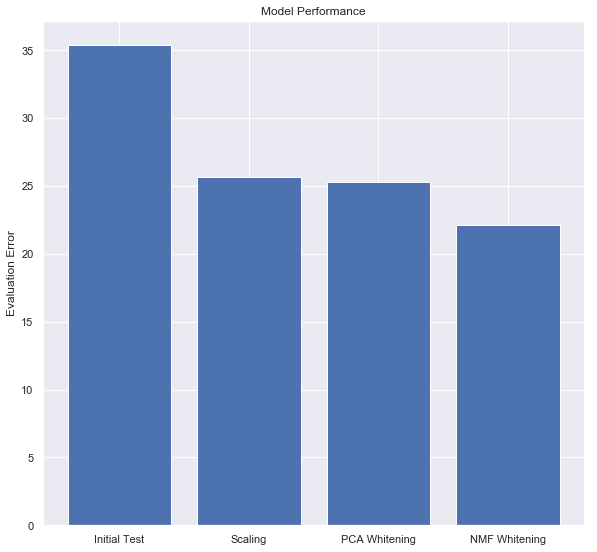

In [135]:
#Bar Chart of Model Performance.
Subjects = ('Initial Test', 'Scaling', 'PCA Whitening', 'NMF Whitening')
ModelResults = (FirstTest, ScaledResult, PCARES, NMFRES,)
y_pos = np.arange(len(Subjects))
plt.bar(y_pos, ModelResults)
plt.xticks(y_pos, Subjects)
plt.title("Model Performance")
plt.ylabel("Evaluation Error")
plt.show()

# Conclusion

### Adding scaling to the initial results improved the model error slightly. The minimum and max scaler was used for this and seemed to give better results than the standard scaler. This is also the case when considering PCA and NMF whitening with the error decreasing slightly on most occasions. There is a stochastic nature to the results maybe attributed to the scaling variance of the data and the high correlations between many of the variables.